# India Rainfall Analysis
## Motivation and Description
Monsoon prediction is clearly of great importance for India.Two types of rainfall predictions
can be done, They are
- Long term predictions: Predict rainfall over few weeks/months in advance.
- Short term predictions: Predict rainfall a few days in advance in specific locations.<br>
<p>Indian meteorological department provides forecasting data required for project.
    In this project we are planning to work on long term predictions of rainfall.
    The main motive of the project is to predict the amount of rainfall in a particular division or state well in advance.
    We predict the amount of rainfall using past data.</p>

## Dataset
- Dataset1([dataset1](https://data.gov.in/resources/district-rainfall-normal-mm-monthly-seasonal-and-annual-data-period-1951-2000))
  This dataset has average rainfall from 1951-2000 for each district, for every month.
- Dataset2([dataset2](https://data.gov.in/resources/subdivision-wise-rainfall-and-its-departure-1901-2015))
  This dataset has average rainfall for every year from 1901-2015 for each state.

## Methodology
- Converting data in to the correct format to conduct experiments.
- Make a good analysis of data and observe variation in the patterns of rainfall.
- Finally, we try to predict the average rainfall by separating data into training and
  testing. We apply various statistical and machine learning approaches(*SVM*,
  etc) in prediction and make analysis over various approaches. By using various
  approaches we try to minimize the error.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("Mydrive")

Drive already mounted at Mydrive; to attempt to forcibly remount, call drive.mount("Mydrive", force_remount=True).


## Types of graphs
- Bar graphs showing distribution of amount of rainfall.
- Distribution of amount of rainfall yearly, monthly, groups of months.
- Distribution of rainfall in subdivisions, districts form each month, groups of months.
- Heat maps showing correlation between amount of rainfall between months.


In [ ]:
#data = pd.read_csv("../data/rainfall_in_indiaC:/Users/USER/Downloads/Rain fall prediction/rainfall_in_india_1901-2015.csv_1901-2015.csv",sep=",")
data=pd.read_csv('/content/Mydrive/MyDrive/rainfall_in_india_1901-2015.csv')
data.tail(10)
#rainfall values in inteegers in all the months

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4106,LAKSHADWEEP,2006,20.1,0.0,33.0,0.3,327.9,286.9,172.3,150.7,318.5,119.1,158.9,10.9,1598.6,20.1,361.2,928.4,288.9
4107,LAKSHADWEEP,2007,2.5,4.2,0.2,22.2,166.2,573.4,427.4,294.7,457.5,256.1,47.6,109.6,2361.6,6.7,188.6,1753.0,413.3
4108,LAKSHADWEEP,2008,5.5,19.8,120.7,15.8,180.4,254.6,363.9,206.6,108.9,252.9,67.6,130.1,1726.8,25.3,316.9,934.0,450.6
4109,LAKSHADWEEP,2009,4.7,1.5,0.1,18.1,162.1,401.2,266.4,185.0,145.1,87.4,166.2,132.3,1570.1,6.2,180.3,997.7,385.9
4110,LAKSHADWEEP,2010,18.8,0.0,1.2,35.6,79.0,318.9,336.7,335.1,161.5,155.4,201.5,81.5,1725.2,18.8,115.8,1152.2,438.4
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [ ]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [ ]:
data.dropna(inplace = True)
#all null values are removed

In [ ]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [ ]:
#data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
dtypes: flo

## Dataset-1 Description
- Data has 36 sub divisions and 19 attributes (individual months, annual, combinations of 3 consecutive months).
- For some of the subdivisions data is from 1950 to 2015.
- All the attributes has the sum of amount of rainfall in mm.

In [ ]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,1958.321271,18.818484,21.644792,27.252494,42.714548,84.868044,228.928020,346.496968,289.897506,197.003056,95.139022,39.548191,18.695575,1411.008900,40.462861,154.835452,1062.325575,153.384499
std,33.148944,33.521719,35.762010,46.829179,67.264863,122.556801,233.535693,269.352685,187.702293,135.266708,99.325638,68.275513,42.185553,903.846565,59.136229,200.315769,705.970202,166.414108
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.500000,70.000000,175.225000,155.925000,100.400000,14.600000,0.700000,0.100000,804.500000,4.100000,23.800000,573.275000,34.025000
50%,1959.000000,5.900000,6.600000,7.800000,15.500000,36.050000,138.450000,284.300000,259.500000,173.600000,64.650000,9.500000,3.000000,1121.300000,19.000000,74.250000,880.200000,97.550000
75%,1987.000000,21.950000,26.600000,31.100000,49.375000,94.975000,302.250000,416.700000,377.775000,265.600000,148.100000,45.475000,17.300000,1644.775000,50.200000,195.300000,1286.175000,211.800000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


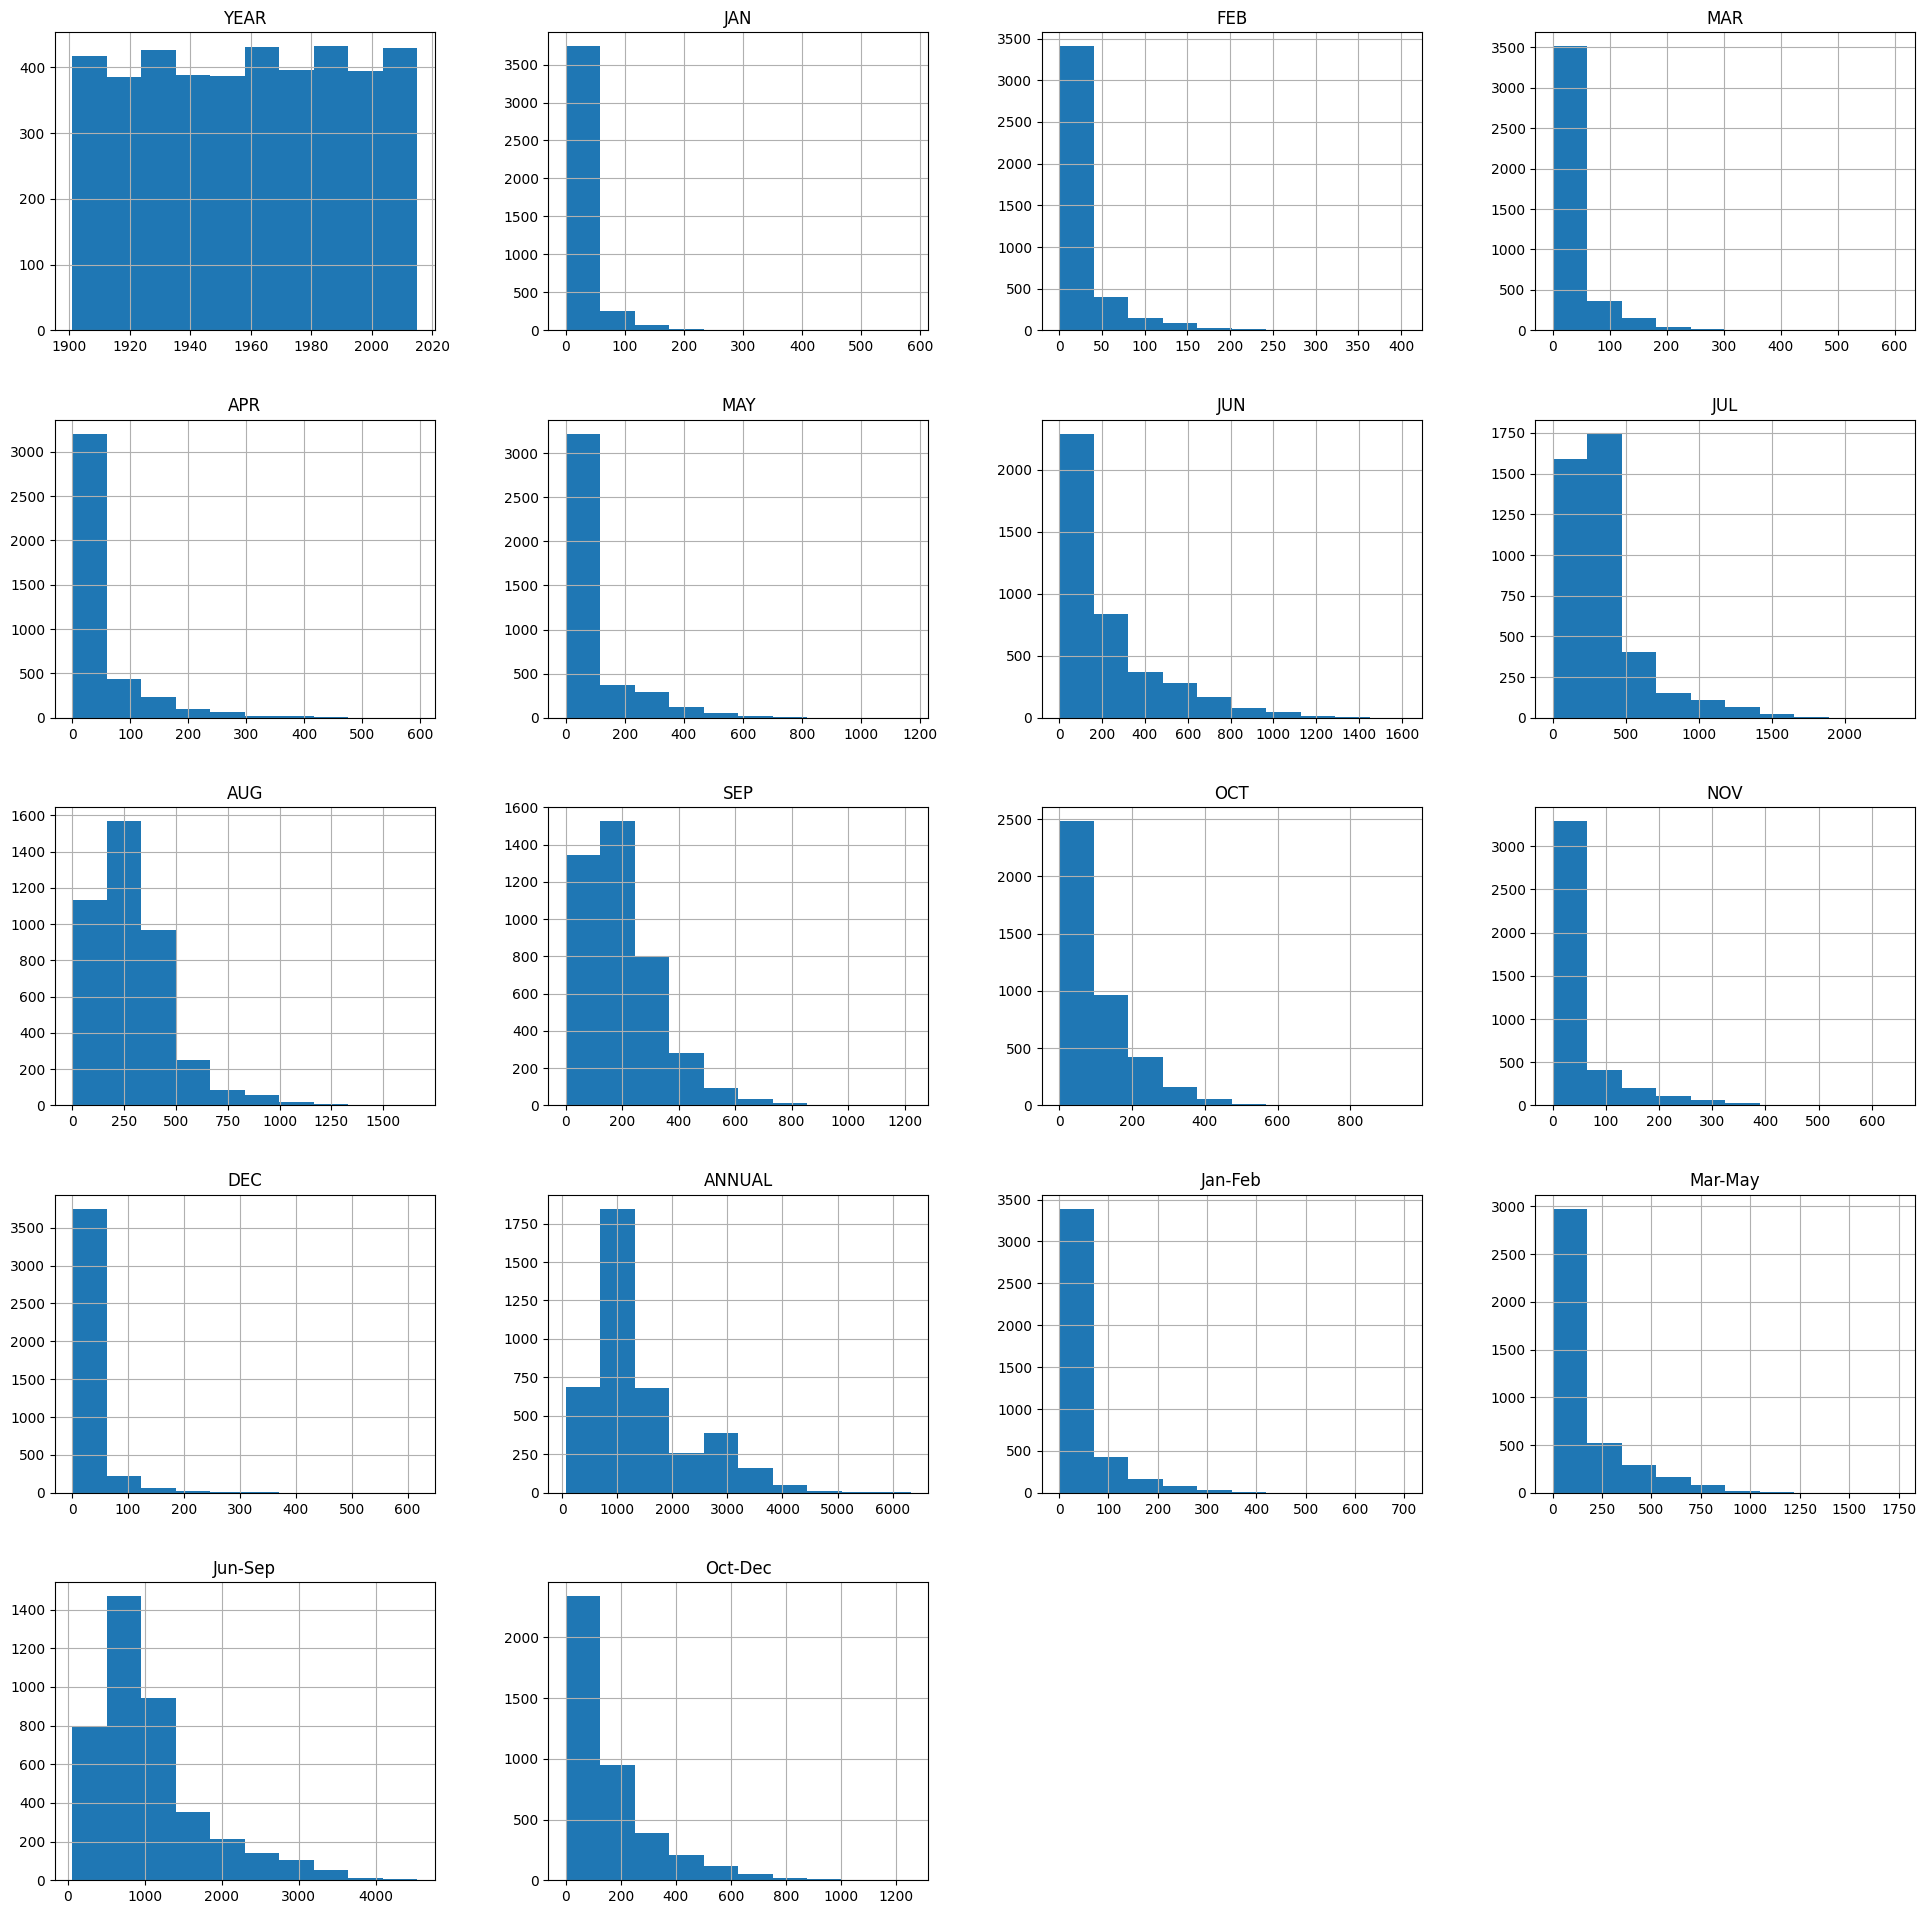

In [ ]:
data.hist(figsize=(24,24));

## Observations
- Above histograms show the distribution of rainfall over months.
- Observed increase in amount of rainfall over months July, August, September.

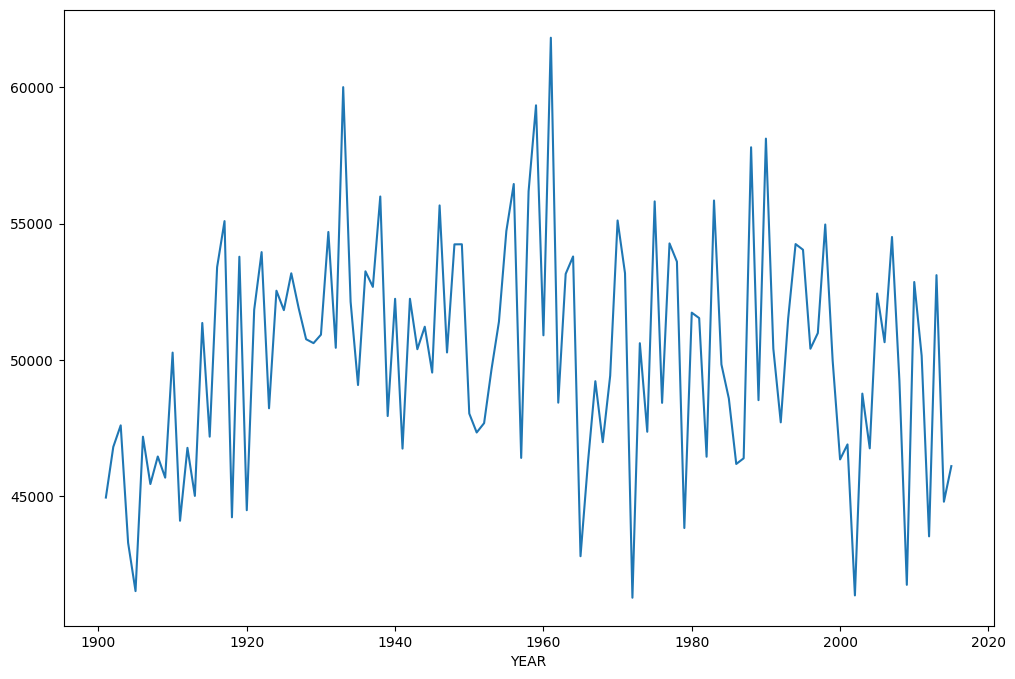

In [ ]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));

## Observations
- Shows distribution of rainfall over years.
- Observed high amount of rainfall in 1950s.

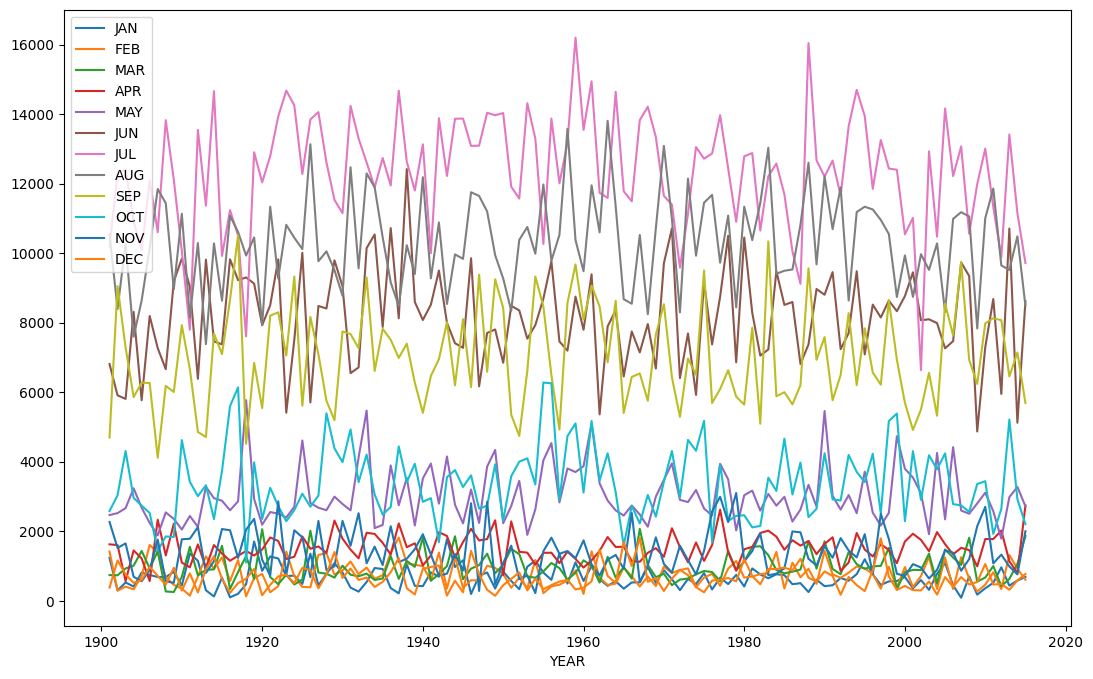

In [ ]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));

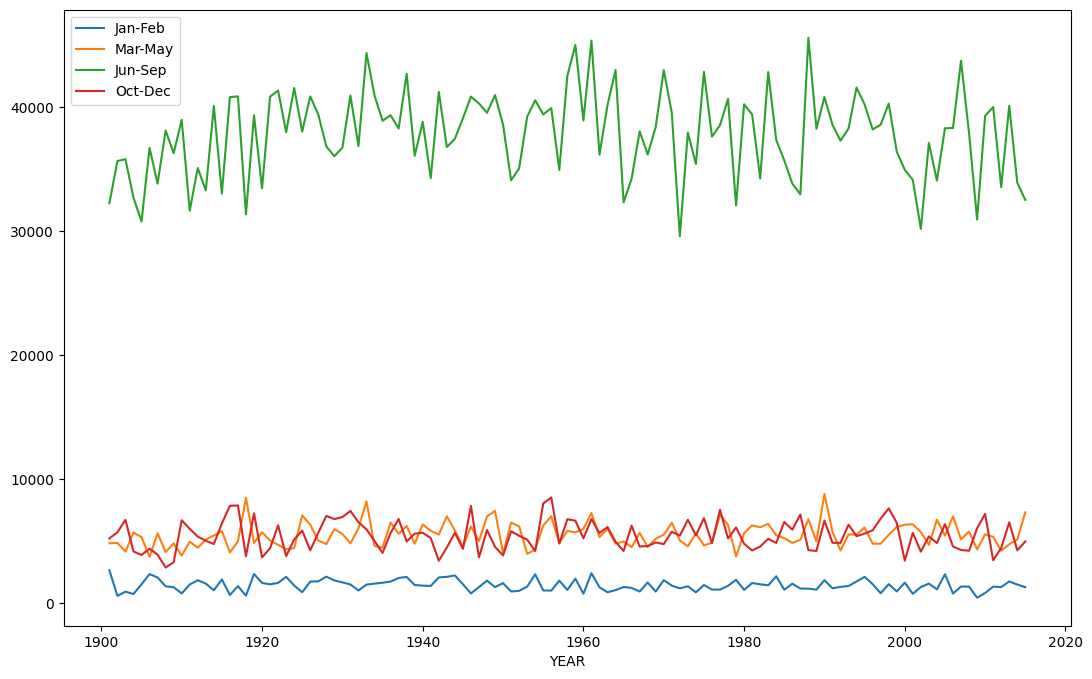

In [ ]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

## Observations
- The above two graphs show the distribution of rainfall over months.
- The graphs clearly shows that amount of rainfall in high in the months july, aug, sep which is monsoon season in India.

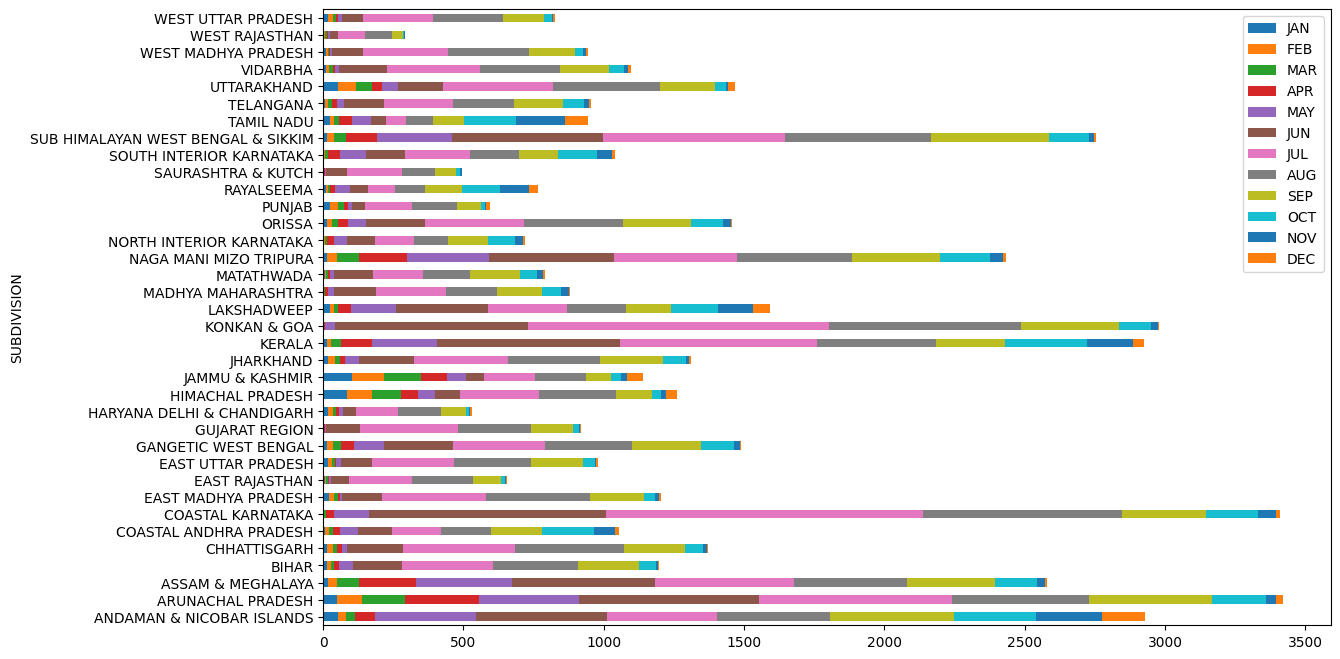

In [ ]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

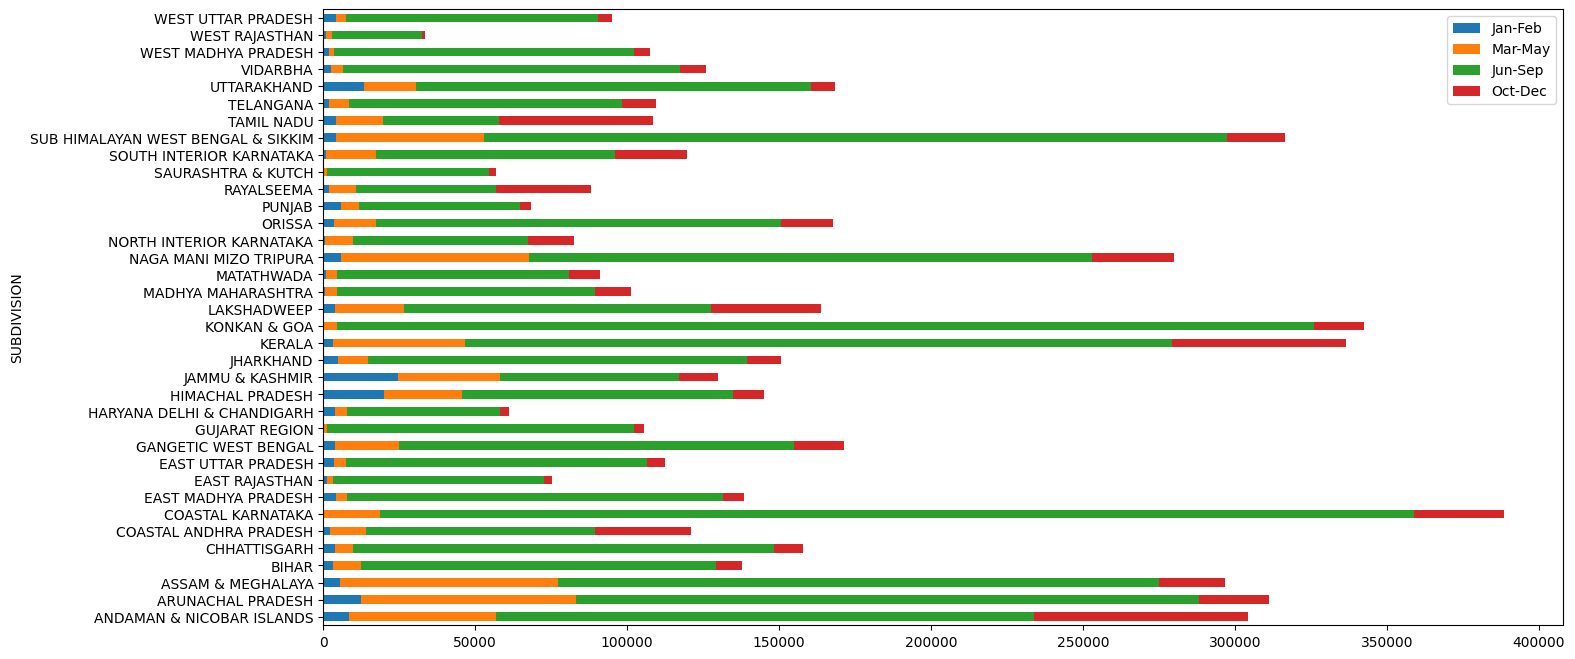

In [ ]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

## Observations
- Above two graphs shows that the amount of rainfall is reasonably good in the months of march, april, may in eastern India.

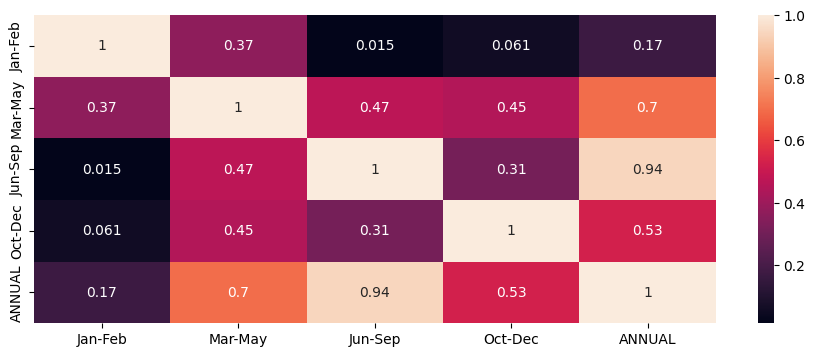

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

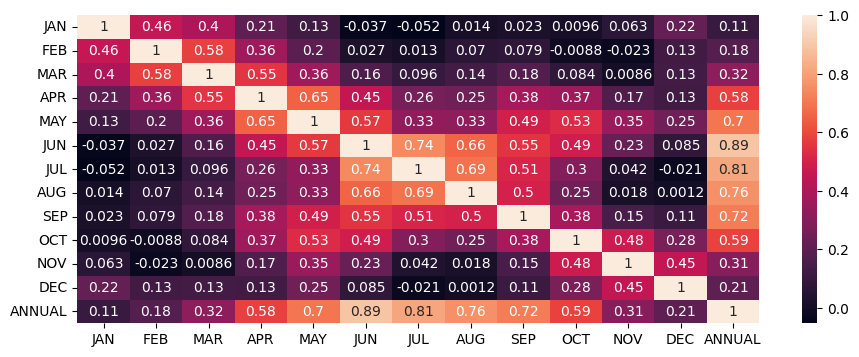

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

## Observations
- **Heat Map** shows the co-relation(dependency) betwenn the amounts of rainfall over months.
- From above it is clear that if amount of rainfall is high in the months of july, august, september then the amount of rainfall will be high annually.
- It is also obwserved that if amount of rainfall in good in the months of october, november, december then the rainfall is going to b good in the overall year.

## Predictions
- For prediction we formatted data in the way, given the rainfall in the last three months we try to predict the rainfall in the next consecutive month.
- For all the experiments we used 80:20 training and test ratio.
    - Linear regression
    - SVR
    -Decision Tree Regression
    -Random Forest Regression
    - Artificial neural nets
- Tersting metrics: We used Mean absolute error to train the models.
- We also shown the amount of rainfall actually and predicted with the histogram plots.
- We did two types of trainings once training on complete dataset and other with training with only telangana data
- All means are standard deviation observations are written, first one represents ground truth, second one represents predictions.


In [ ]:
X=data.iloc[:,0:-5].values
y=data.iloc[:,-5].values
y

array([3373.2, 3520.7, 2957.4, ..., 1426.3, 1395. , 1642.9])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
X[:,0]=label.fit_transform(X[:,0])

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
y_pred=linear.predict(X_test)

In [ ]:
bias=linear.score(X_train,y_train)
bias

0.9999999877803094

In [ ]:
varience=linear.score(X_test,y_test)
varience

0.999999988923927

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mse

0.010015775609998686

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.999999988923927

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

0.07585571789967857

In [ ]:
from sklearn.svm import SVR
svr=SVR(C=10, epsilon= 0.01, kernel= 'linear')
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
y_pred

array([1224.20880796,  740.20941953, 4090.70143514, 1077.90941748,
       2314.10241179, 2971.69243623, 1088.70660318,  641.90836899,
       4041.39803986,  835.1006881 , 3255.49796468, 2546.89608067,
       1112.00742028, 2638.70418908,  451.50971782,  264.11005594,
       1003.2083076 ,  543.80813765, 1003.20857775, 2931.30063648,
        926.70504647,  941.50765219,  566.00853797, 1466.90615289,
        640.40065716,  858.70274279, 1455.60725489,  302.40962236,
       1111.00242397,  783.00597623, 1586.90775371, 4137.98964948,
       2174.89924529, 1862.81310797, 2820.20473539, 1182.70464102,
       1064.50664913,  551.90629951, 1281.20846177, 2537.30994488,
       2550.79476386,  955.50604247, 2591.00912979,  626.41050976,
       1060.59881955,  736.61014566, 1443.10818839, 1600.10620087,
       2361.60453434, 1052.90083498,  790.40326574, 3327.70578851,
        936.20991881, 1050.9052379 ,  265.10986208, 1446.30629673,
        805.10344938, 3027.80714634, 1175.90780908,  723.50782

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

0.00998110163163482

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9999999889622717

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

0.07533935841723845

In [ ]:
bias=svr.score(X_train,y_train)
bias

0.9999999877486554

In [ ]:
varience=svr.score(X_test,y_test)
varience

0.9999999889622717

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]}
grid=GridSearchCV(estimator=svr,param_grid=params,cv=5)
grid.fit(X_train,y_train)
print("best score:",grid.best_score_)
print("best parametes:",grid.best_params_)

best score: 0.9999999876457968
best parametes: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(min_samples_split=9, min_samples_leaf= 3, max_depth=18)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [ ]:
bias=dtree.score(X_train,y_train)
bias

0.9886699657317904

In [ ]:
varience=dtree.score(X_test,y_test)
varience

0.9324054481605538

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mse

61123.81768180529

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9324054481605538

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

167.86474211200377

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)}
rncv=RandomizedSearchCV(estimator=dtree,param_distributions=params,cv=5)
rncv.fit(X_train,y_train)
print("best score:",rncv.best_score_)
print("best params:",rncv.best_params_)

best score: 0.92181583161865
best params: {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 14}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rndf=RandomForestRegressor(n_estimators= 60, min_samples_split=6, min_samples_leaf=1, max_features='sqrt', max_depth= 25)
rndf.fit(X_train,y_train)
y_pred=rndf.predict(X_test)
y_pred

array([1231.2129531 ,  830.64309037, 3450.89140079, 1079.80325054,
       2045.41411279, 2750.98271873, 1091.58836574,  712.84125818,
       3616.27843887,  808.77241276, 3141.4435074 , 2559.20996098,
       1108.74351877, 2652.66398754,  520.99656975,  399.39181746,
       1017.42295611,  585.02293134, 1045.64437169, 2854.87099471,
        972.11427664, 1033.83635263,  589.60054101, 1413.20695172,
        780.93610853,  902.35424832, 1358.37601563,  313.76428002,
       1138.81669992,  879.72633532, 1522.57634758, 3450.28354241,
       2354.96634434, 1557.00794493, 2739.27622733, 1120.74177092,
       1035.84842079,  678.45731151, 1262.32800397, 2365.2556045 ,
       2643.15789538,  917.94250577, 2712.82530754,  616.76812278,
       1115.15030544,  800.04881981, 1397.77496507, 1551.10783929,
       2430.012875  ,  977.40191102,  787.11432762, 3188.31183929,
        917.7637586 , 1011.76622034,  293.59738041, 1426.45778487,
        866.0362672 , 3045.28345972, 1090.71353653,  774.33281

In [ ]:
bias=rndf.score(X_train,y_train)
bias

0.9941439921191243

In [ ]:
varience=rndf.score(X_test,y_test)
varience

0.9709141162456391

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mse

26301.5318148503

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

94.76737487160905

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9709141162456391

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV
params={'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2']}
rncv=RandomizedSearchCV(estimator=rndf,param_distributions=params,cv=5)
rncv.fit(X_train,y_train)
print("best_score:",rncv.best_score_)
print("best params:",rncv.best_params_)

best_score: 0.9739563452821798
best params: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}


Model : Linear regression

bias: 99

varience: 99

r2_Score:0.99

mean_squared_error:0.010015775609998686

mean_absolute_error:0.07585571789967857

Model : support vector Regressor

bias: 99

varience: 99

r2_Score:0.99

mean_squared_error:0.00998110163163482

mean_absolute_error:0.07533935841723845

Model : Decision Tree Regressor

bias: 98

varience: 93

r2_Score:0.93

mean_squared_error:59676.88547294414

mean_absolute_error:166.07709730469207

Model : Random Forest regressor

bias: 99

varience: 97

r2_Score:0.97

mean_squared_error:25434.154888412126

mean_absolute_error:93.49894266234249

=> From all the above model linear regression is best model

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(14,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 14, 1)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 14, 64)            192       
                                                                 
 conv1d_3 (Conv1D)           (None, 14, 128)           16512     
                                                                 
 flatten_1 (Flatten)         (None, 1792)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               229504    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
46/46 [==============================] - 6s 12ms/step - loss: 2679256.7500 - mae: 1380.0045 - val_loss: 2239811.5000 - val_mae: 1276.9777
Epoch 2/10
46/46 [==============================] - 0s 6ms/step - loss: 1777280.8750 - mae: 1153.1866 - val_loss: 653362.1875 - val_mae: 734.2920
Epoch 3/10
46/46 [==============================] - 0s 6ms/step - loss: 369835.0312 - mae: 528.5344 - val_loss: 214692.8750 - val_mae: 402.9364
Epoch 4/10
46/46 [==============================] - 0s 7ms/step - loss: 102107.2969 - mae: 258.4369 - val_loss: 46094.3984 - val_mae: 161.7763
Epoch 5/10
46/46 [==============================] - 0s 7ms/step - loss: 32576.4219 - mae: 128.8967 - val_loss: 23047.1465 - val_mae: 109.7772
Epoch 6/10
46/46 [==============================] - 0s 7ms/step - loss: 17533.7480 - mae: 94.5762 - val_loss: 13073.2148 - val_mae: 84.2341
Epoch 7/10
46/46 [==============================] - 0s 4ms/step - loss: 10288.9678 - mae: 72.4370 - val_loss: 7880.2510 - val_mae: 63.60

Model: Aritifical neural network (ANN)

Mean absolute error=47.977113379592716

## District wise details
- Similar to above the number of attributes is same, we don’t have year in this.
- The amount of rainfall in mm for each district is added from 1950-2000.
- We analyse the data individually for the state **Andhra Pradesh**


In [ ]:
#district = pd.read_csv("../data/district_wise_rainfall_normal.csv",sep=",")
district=pd.read_csv('/content/Mydrive/MyDrive/district_wise_rainfall_normal.csv')
# district = district.fillna(district.mean())
# district.info()

In [ ]:
district.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [ ]:
district.isnull().sum()

STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64

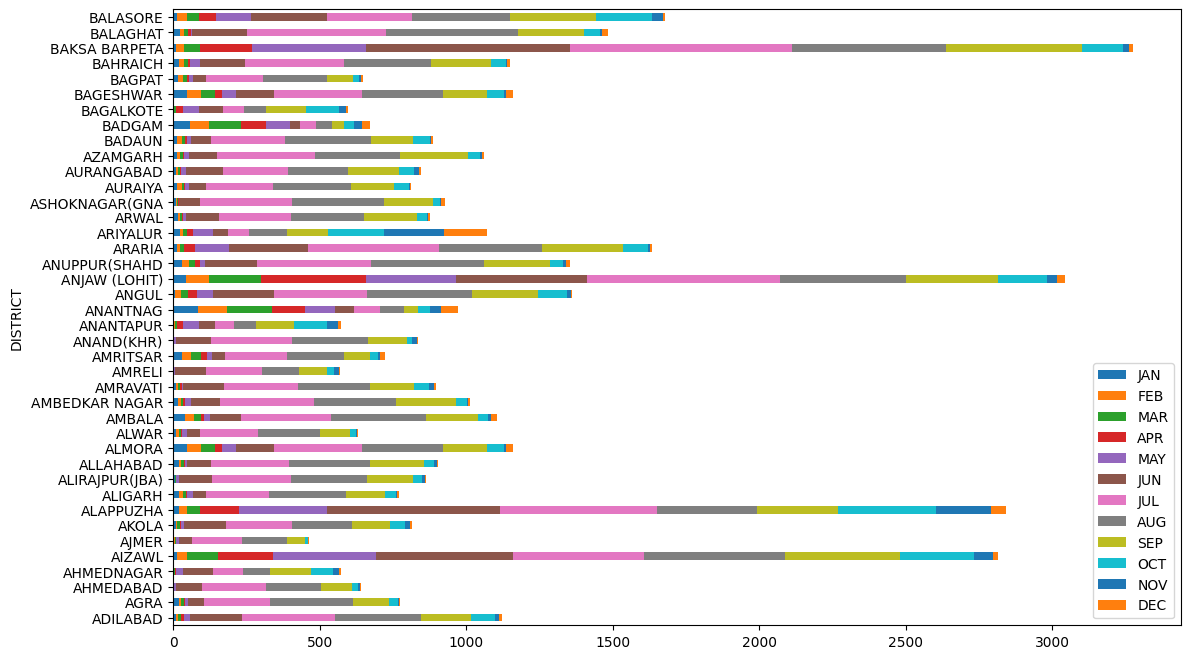

In [ ]:
district[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(13,8));

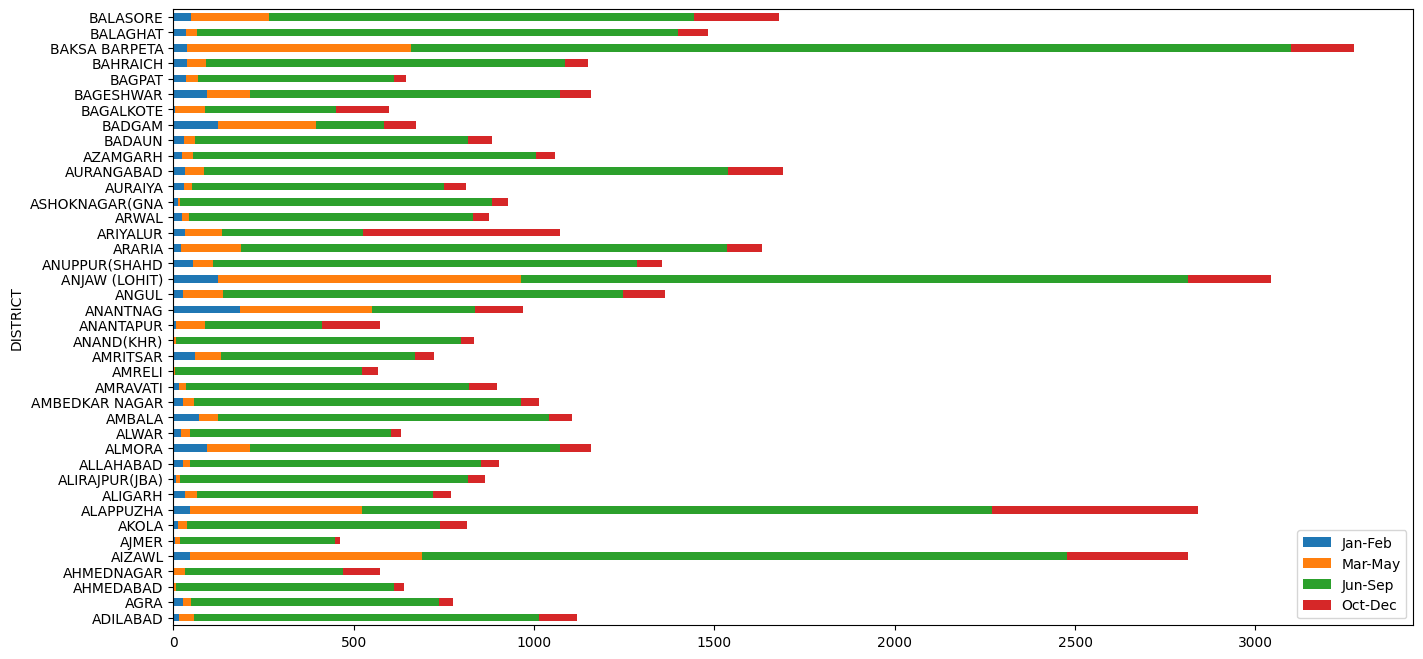

In [ ]:
district[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

## Observations
- The above two graphs shows the distribution of over each district.
- As there are large number of districts only 40 were shown in the graphs.

**Andhra Pradesh Data**

In [ ]:
ap_data = district[district['STATE_UT_NAME'] == 'ANDHRA PRADESH']

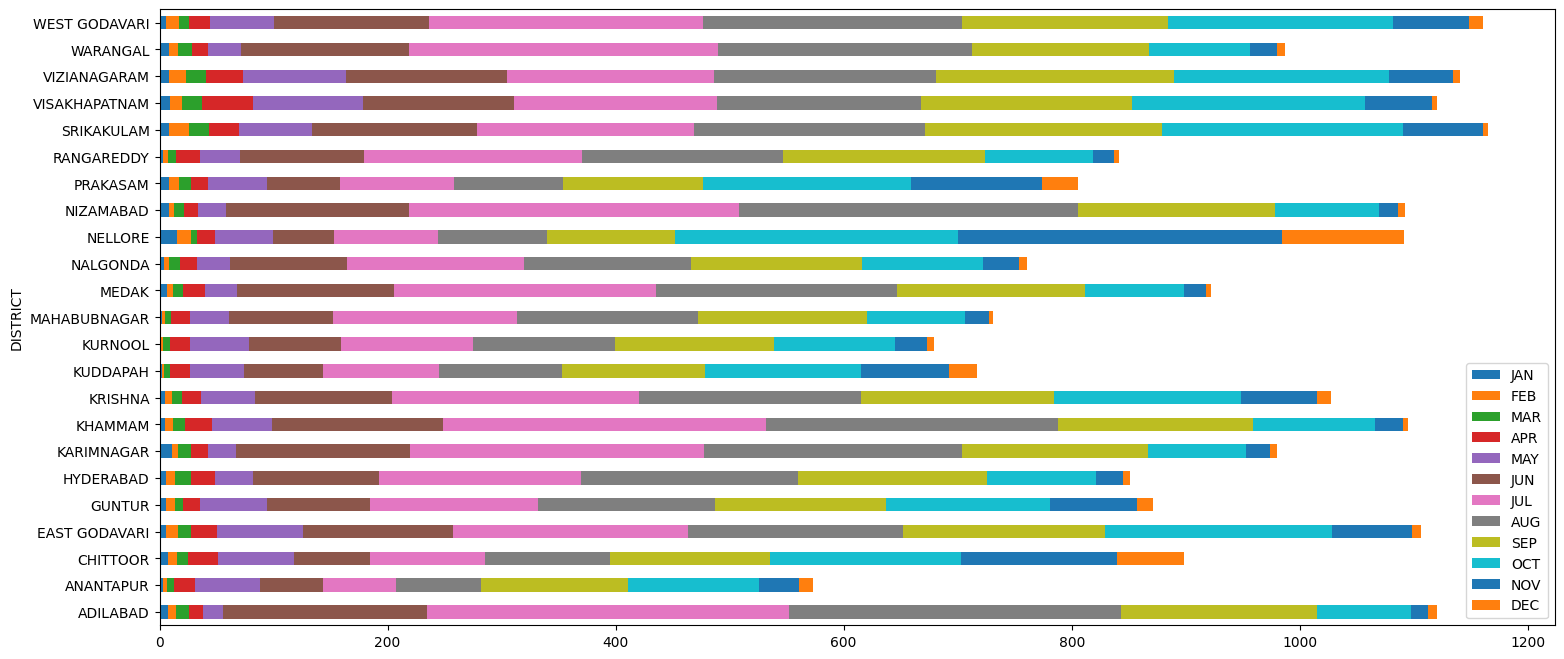

In [ ]:
ap_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(18,8));

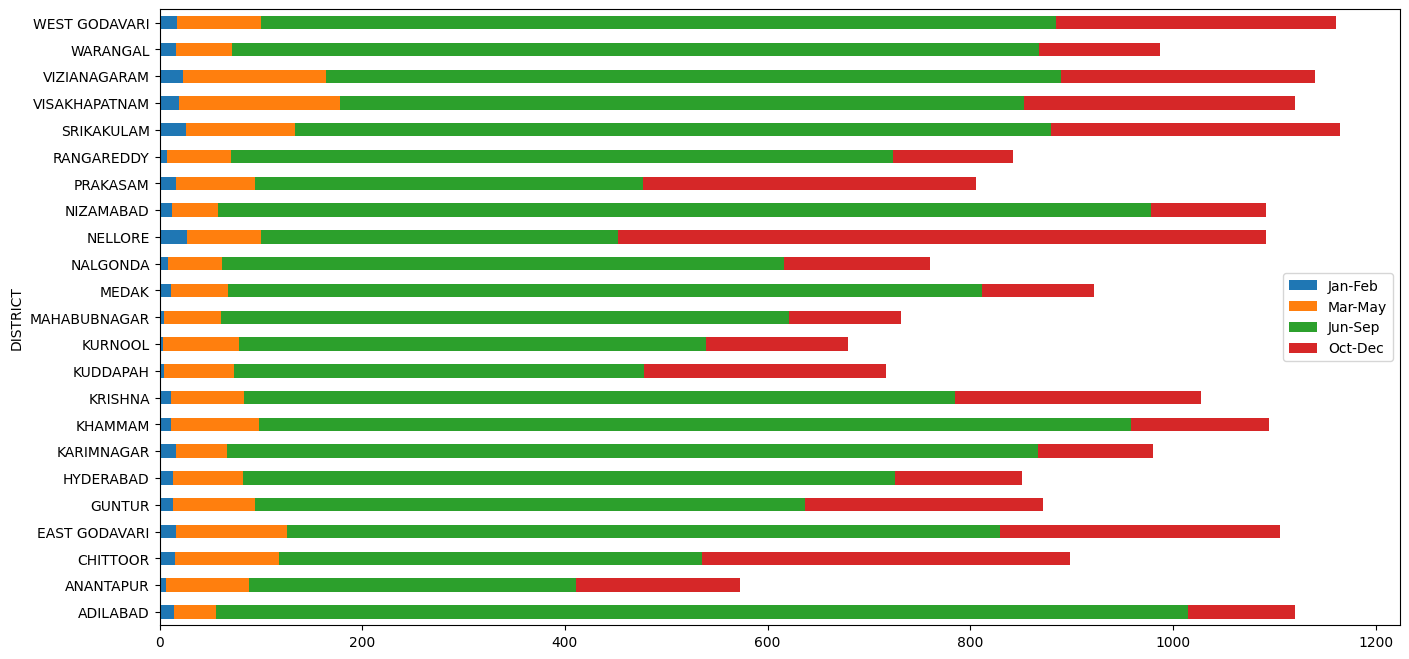

In [ ]:
ap_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

## Observations
- The above two graphs shows the distribution of over each district in **Andhra Pradesh**.
- The above graphs show that more amount of rainfall is found in srikakulam district, least amount of rainfall is found in Anantapur district.
- It also shows that almost all states have more amount of rainfall have more amount of rainfall in the months june, july, september.

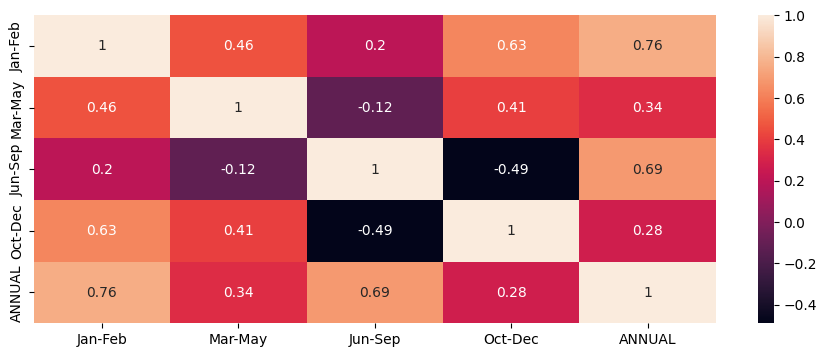

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

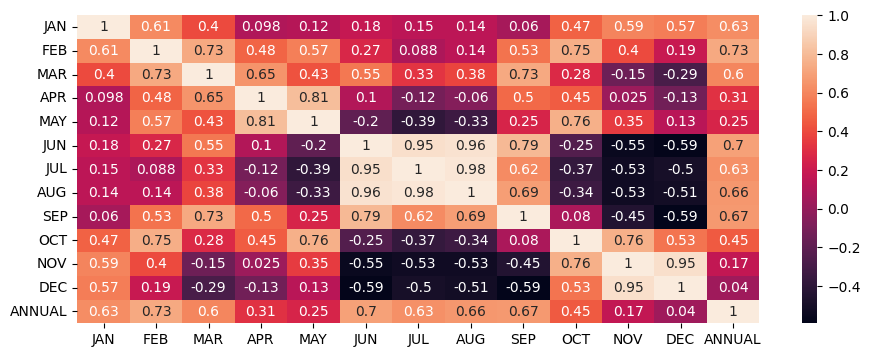

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

## Observations
- It is observed that in **Andhra Pradesh**, annual rainfall depends more in the months of january, febuary.
- It also shows that if there is rainfall in months march, april, may then there is less amount of rainfall in the months june, july, august, september.

## Predictions
- We used the same types of models and evaluation metrics used for the above dataset.
- We also tested the amount of rainfall in hyderabad by models trained on complete dataset and andhra pradesh dataset.

In [ ]:
X=district.iloc[:,0:-5].values
X

array([['ANDAMAN And NICOBAR ISLANDS', 'NICOBAR', 107.3, ..., 326.0,
        315.2, 250.9],
       ['ANDAMAN And NICOBAR ISLANDS', 'SOUTH ANDAMAN', 43.7, ..., 301.2,
        275.8, 128.3],
       ['ANDAMAN And NICOBAR ISLANDS', 'N & M ANDAMAN', 32.7, ..., 276.1,
        198.6, 100.0],
       ...,
       ['KERALA', 'PATHANAMTHITTA', 19.8, ..., 359.4, 213.5, 51.3],
       ['KERALA', 'WAYANAD', 4.8, ..., 213.1, 93.6, 25.8],
       ['LAKSHADWEEP', 'LAKSHADWEEP', 20.8, ..., 157.1, 117.7, 58.8]],
      dtype=object)

In [ ]:
y=district.iloc[:,-5].values
y

array([2805.2, 3015.7, 2913.3, 3043.8, 4034.7, 1300.4, 3571.5, 3043.8,
       2553.3, 3543.9, 3378.2, 1921.1, 4402.1, 2440.7, 2553.3, 3399.4,
       2030.9, 3399.4, 2221.5, 2999.2, 1957.8, 2575.3, 1813.4, 2859.3,
       1977.5, 1660.1, 1811.6, 3274.6, 2702.6, 2556.6, 2083. , 3650.8,
       3772.2, 1978.5, 1680.7, 2485.3, 2645.6, 2859.3, 1341. , 1957.8,
       1813.4, 3218.7, 3274.6, 3218.7, 1743.5, 2356.6, 6166.1, 6379.9,
       2554.4, 2116.9, 2459.8, 3643. , 2459.8, 1839.2, 1922.6, 7229.3,
       2647.5, 1549. , 1286.3, 2127.5, 1530.9, 2337.4, 2814.4, 2168.6,
       2660. , 2731.1, 2814.4, 2557.6, 2814.4, 2480.6, 2505.8, 1824.8,
       2080. , 2409.8, 1305.9, 2497.7, 1339.9, 2080. , 1824.8, 2080. ,
       2080. , 1824.8, 2641.8, 2475.4, 2286.7, 2512.6, 3443.7, 3118.5,
       3468.3, 1419.4, 1584.9, 1727.6, 3094.5, 2582.2, 3094.5, 2582.2,
       1330.9, 1392.8, 1315.2, 1418.7, 1600. , 1363.3, 1391.1, 1261.6,
       1559.8, 2088. , 1669.6, 1535.5, 1709.2, 1679. , 1370.8, 1448.3,
      

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
X[:,0]=label.fit_transform(X[:,0])
X

array([[0, 'NICOBAR', 107.3, ..., 326.0, 315.2, 250.9],
       [0, 'SOUTH ANDAMAN', 43.7, ..., 301.2, 275.8, 128.3],
       [0, 'N & M ANDAMAN', 32.7, ..., 276.1, 198.6, 100.0],
       ...,
       [17, 'PATHANAMTHITTA', 19.8, ..., 359.4, 213.5, 51.3],
       [17, 'WAYANAD', 4.8, ..., 213.1, 93.6, 25.8],
       [18, 'LAKSHADWEEP', 20.8, ..., 157.1, 117.7, 58.8]], dtype=object)

In [ ]:
X[:,1]=label.fit_transform(X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
y_pred=linear.predict(X_test)
y_pred

array([1507.4, 1292.7,  539.6, 1261.6, 1504.4,  853. , 1326.6,  816.3,
       1273.8, 1164.6,  419.8,  887.4, 2374.1, 1197.2, 1992.8,  700.4,
       1081.4, 1428.2,  818. , 2090.6,  573.2,  301.6, 1331.9,  818.7,
       1359.6, 1160.1, 1068.5, 3470.6, 1363.3, 7229.3, 2512.6,  992.2,
       2554.4,  777. ,  730.9,  716.2,  466.5, 1176.5, 1692.9,  898.2,
       1173.3, 3384.1,  572.7,  818.4, 1083.1, 2459.8, 1385. ,  485.7,
       2958.4, 2553.3, 2459.8,  837. ,  947.8,  716.9, 2116.9,  986.3,
       1223.4, 1528.2, 1268.2, 1145.7, 1160.4, 2497.7, 3399.4, 1248.3,
        861.7,  902.3,  860.2, 1481.6, 1058.3, 3070.5,  974.9, 1335.5,
       1029.6, 1028.3, 1403.2, 1313.9, 2814.4, 1157.3,  710.8,  567.3,
        691.4,  455.6, 3015.7, 1122.9,  597. , 1973.9, 1120. , 2356.6,
        656.3,  613.9, 2553.3, 1336.5, 4306. , 3650.8, 2575.3, 2080. ,
       1021.6,  915.2,  979.4, 1598.2,  949.6, 1572.7, 1123.6, 1235.7,
       1196. , 1370.7, 2491.7, 2257.5, 1342.7,  407.9, 2859.3, 1068.4,
      

In [ ]:
bias=linear.score(X_train,y_train)
bias

1.0

In [ ]:
varience=linear.score(X_test,y_test)
varience

1.0

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mse

7.192994685890654e-25

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

7.301515120337898e-13

In [ ]:
r2=r2_score(y_test,y_pred)
r2

1.0

In [ ]:
from sklearn.svm import SVR
svr=SVR(C=0.1, epsilon= 0.01, kernel='linear')
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
y_pred

array([1507.39947827, 1292.7029696 ,  539.61055395, 1261.60463301,
       1504.38810012,  853.00631322, 1326.60394355,  816.30996173,
       1273.80964303, 1164.60692221,  419.80729462,  887.40123597,
       2374.10584337, 1197.19791891, 1992.80340567,  700.39871236,
       1081.40331554, 1428.19579049,  818.00353525, 2090.60746138,
        573.20590884,  301.60838856, 1331.90448843,  818.70595846,
       1359.60395469, 1160.10423769, 1068.50563466, 3470.59510854,
       1363.30359048, 7229.27805817, 2512.60497146,  992.20648079,
       2554.4032476 ,  777.00671615,  730.90591913,  716.20535223,
        466.50639682, 1176.5073647 , 1692.90952868,  898.20311805,
       1173.29675487, 3384.09592301,  572.70602764,  818.40487028,
       1083.10195948, 2459.80763124, 1384.99926559,  485.7098609 ,
       2958.39234419, 2553.29509848, 2459.80794622,  837.0041668 ,
        947.80763998,  716.9056415 , 2116.90887892,  986.3057687 ,
       1223.40510641, 1528.20150893, 1268.19371141, 1145.70591

In [ ]:
bias=svr.score(X_train,y_train)
bias

0.9999999999498059

In [ ]:
varience=svr.score(X_test,y_test)
varience

0.9999999999604281

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

3.803721970291173e-05

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

0.005470118188462712

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9999999999604281

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]}
grid=GridSearchCV(estimator=svr,param_grid=params,cv=5)
grid.fit(X_train,y_train)
print("best_score:",grid.best_score_)
print("best_params:",grid.best_params_)

best_score: 0.9999999999414501
best_params: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=1, max_depth=8)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
y_pred

array([1386.62222222, 1332.77142857,  551.5       , 1402.5       ,
       1333.97777778,  936.59272727, 1461.1375    ,  938.62      ,
       1299.44      , 1197.34      ,  480.11428571,  806.28135593,
       2433.4       , 1115.68139535, 2009.775     ,  706.45833333,
       1115.68139535, 1272.15714286,  706.45833333, 2009.775     ,
        806.28135593,  188.        , 1360.68      ,  743.34615385,
       1461.1375    , 1115.68139535, 1115.68139535, 3263.12727273,
       1402.5       , 6273.        , 2541.5       ,  967.23333333,
       2715.66      ,  806.28135593,  806.28135593,  806.28135593,
        480.11428571, 1272.15714286, 1584.725     ,  806.28135593,
       1333.97777778, 3263.12727273,  706.45833333,  806.28135593,
       1115.68139535, 2715.66      , 1272.15714286,  480.11428571,
       2715.66      , 2105.25      , 2715.66      ,  806.28135593,
        936.59272727,  806.28135593, 1643.85      ,  936.59272727,
       1272.15714286, 1360.68      , 1272.15714286, 1115.68139

In [ ]:
bias=dtree.score(X_train,y_train)
bias

0.9911866798343613

In [ ]:
varience=dtree.score(X_test,y_test)
varience

0.9391097343705196

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

58528.79138624923

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

122.21821974482144

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9391097343705196

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)}
rncv=RandomizedSearchCV(estimator=dtree,param_distributions=params,cv=5)
rncv.fit(X_train,y_train)
print("best score:",rncv.best_score_)
print("best params:",rncv.best_params_)

best score: 0.9447951975264541
best params: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 8}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rndf=RandomForestRegressor(n_estimators= 130,min_samples_split= 7,min_samples_leaf=1,max_features='sqrt',max_depth=20)
rndf.fit(X_train,y_train)
y_pred=rndf.predict(X_test)
y_pred

array([1517.37001511, 1357.41881892,  568.73188765, 1354.12227291,
       1168.56971473,  878.4994781 , 1297.50074623,  829.0729955 ,
       1326.10642539, 1178.7227213 ,  455.5404916 ,  932.11052547,
       2313.30658109, 1175.99603608, 1975.36600987,  768.84599238,
       1076.30454903, 1376.30704882,  854.16829865, 2059.86024453,
        695.55633654,  301.74122766, 1320.98932184,  864.71846457,
       1420.56494882, 1129.00604429, 1090.99928084, 3162.42207   ,
       1411.73480645, 5143.32744825, 2403.04324839,  960.76826079,
       2649.76255486,  786.86530578,  765.45806045,  745.08204222,
        483.97517494, 1191.05313323, 1675.06812517,  882.19587965,
       1089.69139175, 3090.28464175,  703.45803441,  822.70435976,
       1066.9778139 , 2609.31428629, 1347.33452047,  506.49553575,
       2773.64482586, 2378.26146831, 2625.27499142,  845.78643198,
        948.08705719,  761.04337477, 2093.24386169,  996.3710997 ,
       1229.77291333, 1481.53178328, 1246.6716524 , 1139.15889

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

44611.56643015388

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

74.90370559708728

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9535884807162194

In [ ]:
bias=rndf.score(X_train,y_train)
bias

0.9913362424804687

In [ ]:
varience=rndf.score(X_test,y_test)
varience

0.9535884807162194

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2']}
rncv=RandomizedSearchCV(estimator=rndf,param_distributions=params,cv=5)
rncv.fit(X_train,y_train)
print("best_score:",rncv.best_score_)
print("best_params:",rncv.best_params_)

best_score: 0.9692339555372156
best_params: {'n_estimators': 130, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(14,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 14, 1)]           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 14, 64)            192       
                                                                 
 conv1d_9 (Conv1D)           (None, 14, 128)           16512     
                                                                 
 flatten_4 (Flatten)         (None, 1792)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               229504    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
8/8 [==============================] - 0s 22ms/step - loss: 2750.5623 - mae: 41.1269 - val_loss: 1906.1938 - val_mae: 32.2714
Epoch 2/10
8/8 [==============================] - 0s 14ms/step - loss: 1914.8242 - mae: 31.6308 - val_loss: 1191.6704 - val_mae: 28.5728
Epoch 3/10
8/8 [==============================] - 0s 18ms/step - loss: 1264.2307 - mae: 26.3977 - val_loss: 954.2483 - val_mae: 25.7156
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 1016.2921 - mae: 22.8511 - val_loss: 648.4730 - val_mae: 20.4175
Epoch 5/10
8/8 [==============================] - 0s 19ms/step - loss: 881.5589 - mae: 20.9685 - val_loss: 651.7484 - val_mae: 20.3384
Epoch 6/10
8/8 [==============================] - 0s 19ms/step - loss: 756.9177 - mae: 19.5911 - val_loss: 576.5121 - val_mae: 19.2461
Epoch 7/10
8/8 [==============================] - 0s 26ms/step - loss: 664.5837 - mae: 18.4108 - val_loss: 495.2064 - val_mae: 17.8773
Epoch 8/10
8/8 [==============================] -

Model: LinearRegression

bias:1.0

varience:1.0

mean squared error:7.192994685890654e-25

r2 score:1.0

mean absoluteerror:7.301515120337898e-13


Model: support vector regressor

bias:99

varience:99

mean squared error:7.192994685890654e-25

r2 score:99

mean absoluteerror:0.005470118188462712


Model: Decisiontree regressor

bias:99

varience:93

mean squared error:58528.79138624923

r2 score:99

mean absoluteerror:122.21821974482144


Model: RandomForest regressor

bias:99

varience:95

mean squared error:44611.56643015388

r2 score:95

mean absoluteerror:74.90370559708728

Model : ANN

meanabsolute error:15.705367971021072

=> From the above all model linear regression is best model


## Conclusions
- Various visualizations of data are observed which helps in implementing the approaches for prediction.
- Prediction of amount of rainfall for both the types of dataset.
- Observations indicates machine learning models won't work well for prediction of rainfall due to fluctutaions in rainfall.

## Technologies
- Programming language : *Python*
- Libraries : *numpy, pandas, matplotlib, seaborn, keras, scipy, sklearn*
- Github repo: [link](https://github.com/sudheerachary/rainfall-prediction)
